# Project: Wrangling and Analyze Data

## Table of contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Gather">Gather</a></li>
<li><a href="#Assess">Assess and explore data</a></li>
<li><a href="#Clean">Clean data</a></li>
<li><a href="#store">Store Data</a></li>   
<li><a href="#analysis">Analysis and Visualization</a></li>
</ul>

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.  
**Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

## Introduction

In [1]:
#pip install tweepy

In [3]:
# Import the packages 
import pandas as pd
import numpy as np
import requests
import tweepy 
import json 
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather

In [4]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
import requests

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [8]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#Reading the data from the tweet_json.txt
all_data = [] #declaring a list for storing lines
with open('tweet-json.txt', encoding='utf-8') as json_file:  
    for line in json_file:
        all_data.append(json.loads(line))

#Gathering some data from the tweet_json2 file
retweet_list = []
for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        retweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                            })


In [10]:
#Creating a Data Frame basing on the list of elements gathering form tweet_json2 file
retweet_count = pd.DataFrame(retweet_list, columns = ['tweet_id', 'favorite_count','retweet_count'])
retweet_count.head()


,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [11]:
retweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


We managed to collect data from different sources and in different formats. We now have three data frames:  
* archive  
* image_prediction  
* retweet_count  

<a id='Assess'></a>
## Assess and explore  data

### Let's see archive data and explore it

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Checking how many NAN's are in the data
archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

More than 90% of the values are NAN in the columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. We are going to drop those columns

In [14]:
# Let's check if there are duplicated rows or duplicated tweet_id
print(archive.duplicated().sum())
print(archive.tweet_id.duplicated().sum())

0
0


There is not duplicated row or tweet in the data

In [15]:
# Let's check how many type of source are there?
archive.source.value_counts()
#archive.source.str.findall(">(.*?)</a>", flags=re.IGNORECASE).apply(lambda x: x[0]).value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

There iare for types of source but are between html tags.

In [16]:
# Get the unique values in the colums doggo, floofer, pupper and puppo
print(archive.doggo.unique())
print(archive.floofer.unique())
print(archive.pupper.unique())
print(archive.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


We see that the values has two types, None and the other correspond with the name of the column. We should clasificar those 4 categories in one column that we are going to call Stage. Let's see if we get more data from the tweets 8text column)

In [17]:
# let's inspect the text of the tweets
for text in  archive.text:
    print(text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

This is Fletcher. He's had a ruff night. No more Fireball for Fletcher. 8/10 it'll be over soon pupper https://t.co/tA4WpkI2cw
Say hello to Kenzie. She is a fluff ball. 12/10 you'd need to taser me for me to let go of her https://t.co/dph1UHNJrg
This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq
This is Schnozz. He's had a blurred tail since birth. Hasn't let that stop him. 10/10 inspirational pupper https://t.co/a3zYMcvbXG
Very happy pup here. Always smiling. Loves his little leaf. Carries it everywhere with him. 9/10 https://t.co/81BCQAyvcs
Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu
This is Chuckles. He is one skeptical pupper. 10/10 stay woke Chuckles https://t.co/ZlcF0TIRW1
This is Chet. He's having a hard time. Really struggling. 7/10 hang in there pupper https://t.co/eb4ta0xtnd
This is Gustaf. He's a purebred Chevy Equinox. Loves to 

We see that the words doggo, floofer, pupper and puppo, appear is the column text, so we are going to extract those words from text column and create a new column call stage. We see that some of the row in the column text are retweet and all of them star with (RT @) we are going to drop them.


In [18]:
# Check data type
type(archive.timestamp[0])

str

We have to convert this column to timestamp format

### Let's see the column name

In [19]:
archive.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

Even when it seemed that the column name didn't have NAN, we can see that there are 745 None values in this column. That amount of NAN (None) is huge and at the same times there are value like a, an, the, which are not names, all of them start with lowercase.

Let's see how many name star with lowercase

In [20]:
archive[archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [21]:
archive[archive.name.str.islower()].name.value_counts().sum()

109

There are 109 names that star with lowercase where none of them are dog names.

In [22]:
archive[archive.name.str.islower()].name.value_counts().sum() +745

854

The column name has 854 between None and lowercase words. We are goin to try to get name from the text column.

### Let's see how thet text column looks like when name is equal to 'a'

In [23]:
pd.options.display.max_colwidth = 200
archive[archive['name']== 'a'].text

56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649                                Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801                    Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002                   This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004                     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017                         This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
1049            

It seems that they extracted the names of the dog from the column text after the phrases "this is" or "here is", but some names apeer rigth after 'named. Let's try to prove that.

In [24]:
# This extract all the words after the frase "This is"
print(archive['text'].str.extractall(r'\bThis is\s+(\S+\s+\S+)')[0].str.split('.').str[0].str.split(' ').str[0])

# This extract all the words after the frase "Here is"
print(archive['text'].str.extractall(r'\bHere is\s+(\S+\s+\S+)')[0].str.split('.').str[0].str.split(' ').str[0])

# This extract all the words after the frase "named"
print(archive['text'].str.extractall(r'\bnamed\s+(\S+\s+\S+)')[0].str.split('.').str[0].str.split(' ').str[0])

      match
0     0         Phineas
1     0           Tilly
2     0          Archie
3     0           Darla
4     0        Franklin
                 ...   
2347  0               a
2349  0              an
2350  0               a
2352  0               a
2354  0               a
Name: 0, Length: 1268, dtype: object
      match
56    0             a
492   0         Atlas
649   0             a
1340  0             a
1351  0             a
1382  0             a
2211  0             a
2222  0             a
2262  0        George
2297  0          Dave
2346  0           the
2348  0             a
2353  0             a
Name: 0, dtype: object
      match
603   0          Tickles
1853  0            Wylie
1955  0              Kip
2034  0            Jacob
2066  0            Rufus
2116  0            Spork
2125  0         Cherokee
2128  0            Hemry
2146  0          Alphred
2161  0          Alfredo
2166  0             Zeus
2191  0            Leroi
2204  0            Berta
2218  0             Chuk
2227

We see that if we try to extract from the phrases "this is" and "here is", we get valid names of the dogs as well invalid names that start with lowercase. Meanwhile, extracting with the word "named" returns the valid name of the dogs.


### Let's explore expand_url

In [25]:
for url in archive.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/phot

https://twitter.com/dog_rates/status/667188689915760640/photo/1
https://twitter.com/dog_rates/status/667182792070062081/photo/1
https://twitter.com/dog_rates/status/667177989038297088/photo/1
https://twitter.com/dog_rates/status/667176164155375616/photo/1
https://twitter.com/dog_rates/status/667174963120574464/photo/1
https://twitter.com/dog_rates/status/667171260800061440/photo/1
https://twitter.com/dog_rates/status/667165590075940865/photo/1
https://twitter.com/dog_rates/status/667160273090932737/photo/1
https://twitter.com/dog_rates/status/667152164079423490/photo/1
https://twitter.com/dog_rates/status/667138269671505920/photo/1
https://twitter.com/dog_rates/status/667119796878725120/photo/1
https://twitter.com/dog_rates/status/667090893657276420/photo/1
https://twitter.com/dog_rates/status/667073648344346624/photo/1
nan
https://twitter.com/dog_rates/status/667065535570550784/photo/1
https://twitter.com/dog_rates/status/667062181243039745/photo/1
https://twitter.com/dog_rates/status

We see that the patron to a valited url with image is like https://twitter.com/dog_rates/status/889531135344209921/photo/1 where 889531135344209921 correspond to tweet_id and it could be photo or video. There are some repeted url in the same field or doesn't star with https://twitter.com/. we are going to clean this column extracting the correct patron like https://twitter.com/dog_rates/status/889531135344209921/photo/1 or video,  otherwise it woul be NAN.

### Let's inspect the rating columns

In [26]:
archive.rating_denominator.sort_values(ascending = False)

1120    170
902     150
1634    130
1779    120
1635    110
       ... 
776      10
806      10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [27]:
archive.rating_numerator.sort_values(ascending= False)

979     1776
313      960
189      666
188      420
2074     420
        ... 
2335       1
605        1
2038       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

There are some values in the denominator diferrent than 10. We find values in the numerator less than 10 too and some values so high like 1776,960, 666 and so for.

Let's see some patron between the text colum and the rating columns.

In [28]:
archive[archive['rating_numerator'] < 10][['text', 'rating_numerator', 'expanded_urls']]

,text,rating_numerator,expanded_urls
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1"
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,https://twitter.com/dog_rates/status/848212111729840128/photo/1
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1"
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,NaN
462,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,https://twitter.com/dog_rates/status/692417313023332352/photo/1
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,https://twitter.com/dog_rates/status/666029285002620928/photo/1


There are 440 tweets that have rating_numerator below 10,  there are some values in the numerator in the text column with decimal places that is causing problems.

In [29]:
# Get rating_denoinator less tahn 10
archive[archive['rating_denominator'] < 10][['text', 'rating_denominator', 'expanded_urls']]

,text,rating_denominator,expanded_urls
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0,NaN
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1"
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2,https://twitter.com/dog_rates/status/666287406224695296/photo/1


The rating_denominator should be 10 and we have other values. if we look in the text column above, there is a patron where the rating is at the end of the tweet and we found in the same tweet more the one rating patron. It seem that they extracted the rating from the first one. We'll fix that.

In [30]:
archive[archive['rating_numerator'] >100][['text', 'rating_numerator', 'expanded_urls']]

,text,rating_numerator,expanded_urls
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,NaN
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,NaN
290,@markhoppus 182/10,182,NaN
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,NaN
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,https://twitter.com/dog_rates/status/758467244762497024/video/1
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,https://twitter.com/dog_rates/status/749981277374128128/photo/1
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,https://twitter.com/dog_rates/status/731156023742988288/photo/1
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1"
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,https://twitter.com/dog_rates/status/684222868335505415/photo/1
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,https://twitter.com/dog_rates/status/677716515794329600/photo/1


Some of the high value of numerator don't have expand_url nd  we are not interested in those values. We have to check those values to see if they are dogs or like in the cases of 1776/10 or 420/10 give us a large number (maybe are outliars). There are repeated links in the expands_url column.

In [31]:
# Let's get the tweet_id of the rating_numerator equal to 1776 and 420
print(archive.query('rating_numerator== 420.0')[['tweet_id']])
print(archive.query('rating_numerator== 1776.0')[['tweet_id']])

                tweet_id
188   855862651834028034
2074  670842764863651840
               tweet_id
979  749981277374128128


We are going to inspect those tweet_id: 855862651834028034, 670842764863651840 and  749981277374128128

### Let's see how many None values there are in the 'doggo','floofer', 'pupper', 'puppo'

In [32]:
df_none =archive[[ 'doggo','floofer', 'pupper', 'puppo']]
df_none[df_none.eq('None').all(axis=1)]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


In [33]:
print('pupper: ', archive.pupper.value_counts()[1])
print('doggo: ', archive.doggo.value_counts()[1])
print('puppo: ', archive.puppo.value_counts()[1])
print('floofer: ', archive.floofer.value_counts()[1])

pupper:  257
doggo:  97
puppo:  30
floofer:  10


The archive data has 1976 rows where the values of the variables: doggo, floofer, pupper and puppo are None, That is more that 83 % of the total data. We need other aproach to try to get more data about the stage of the dogs. If we see above the words doggo, floofer, pupper and puppo, appear is the column text, so we are going to extract those words from text column and create a new column called stage. We have to keep in mind that trere ara tweet with multiple dogs in the picture and with the stage in plural, so we try to get that.

### Let's explore image_prediction

In [34]:
# Lets check some random rows in image _prediction dataFrame
image_prediction.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1015,709852847387627521,https://pbs.twimg.com/media/CdnnZhhWAAEAoUc.jpg,2,Chihuahua,0.945629,True,Pomeranian,0.019204,True,West_Highland_white_terrier,0.010134,True
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
1923,857029823797047296,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True


In [35]:
# Checking dimension of the dataframe
image_prediction.shape

(2075, 12)

In [36]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

There are not nan's in the dataframe

In [38]:
# Let's see p1 column
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [39]:
# Let's see p2 column
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [40]:
# Let's see p3 column
image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

We see that p1, p2, p3 are breed of dogs. We are going to change all breeds of dogs to lowercase because p1, p2, p3 have inconsistent capitalization, sometimes first letter is capital and other are lowercase.

### Let's inpect jpg_url

In [41]:
for image in image_prediction.jpg_url:
    print(image)

https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg
https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg
https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg
https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg
https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg
https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg
https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg
https://pbs.twimg.com/media/CT8g3BpUEAAu

It seems that all the urls in jpg_url are images.

### Let's see if there are duplicated valued in jpg_url

In [42]:
image_prediction.jpg_url.duplicated().sum()

66

image_prediction has 66 duplicated jpg_url (imges).

### Let's see if all the columns value are the same in the duplicated jpg_url

In [43]:
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


We see that all the columns in the 66 duplicated jpg_url are duplicated.

In [44]:
image_prediction[image_prediction['jpg_url'] == 
                 'https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


We are going to drop those 66  duplicated rows with the same jpg_url value.

In [45]:
# Let's get how many unique p_dog values are there?
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [46]:
# Getting the count of each unique img_num values 
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [47]:
image_prediction[image_prediction['tweet_id']== 889531135344209921]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True


Here we see, that tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921,  p1 is the algorithm's #1 prediction for the image in the tweet (golden retriever), p1_conf is how confident the algorithm is in its #1 prediction → 95%,   p1_dog is whether or not the #1 prediction is a breed of dog → TRUE,  p2 is the algorithm's second most likely prediction → Labrador retriever,  p2_conf is how confident the algorithm is in its #2 prediction → 1%,  p2_dog is whether or not the #2 prediction is a breed of dog → TRUE, etc.  So #1 prediction is the correct.  

We are going to write a code to get that.


### Let's see how many all prediction are false

In [48]:
image_prediction.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


We get 324 rows where all prediction(p1_dog, p2_dog and p3_dog) are false

### Let's see some of this picture where all predictions are false.

In [49]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg", width=400, height=400)


In [50]:
Image(url= "https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg", width=400, height=400)

We see clearly that these are not dogs. We are not interested in those tweets

### Let's get back to the rating_numerator  to see what happend with the photos when this numerator is so low or rating denominator is greater than 10.
I'm going to use ipyplot to see the photo tweets https://pypi.org/project/ipyplot/1.0.5/

In [51]:
import ipyplot
def get_photos(data, rating_variable, min_value, max_value):
    """
     this function returns a set of photos of tweets from a data 
     frame (data), based on a range of values. Rating_numerator or 
     rating_denominator can be used as the column name in the data. 
     The maximum number of photographs displayed is fifty.
     
     Arguments:
    :data: panda dayaframe from get the tweets photos.
    :rating_variable: It could be rating_numerator or rating_denominator.
    :min_value: minimun value from rating_numerator or rating_denominator.
    :max_value: maximun value from rating_numerator or rating_denominator.
    :return: Photos of the tweets.
    """     
    index_rating = archive[(archive[rating_variable] >= min_value) & (archive[rating_variable] <= max_value)].index
    #index_rating  = archive.query("ranting_variable > min_value | (ranting_variable < max_value").index
     
    # Get all the tweet_id  that come from the index_low_numerator
    ids = archive.iloc[index_rating].tweet_id

    # Get all the jpg_url that have the tweet_id equal to ids as list
    list_url =list(data[image_prediction['tweet_id'].isin(list(ids))].jpg_url)
    #list_url

    # plot all list_url where the rating_numerator is less or equal to 5
    return ipyplot.plot_images(list_url, max_images=50, img_width=150)

In [52]:
# Let's get the photos where rating numerator is less or equal to 5
get_photos(image_prediction,'rating_numerator', 0,5)

  We see that most of the picture are not dogs, We are going to take that in a count when We we clean the ranting values.

In [53]:
# Let's see when rating_denominator is greater than ten.
get_photos(image_prediction,'rating_denominator', 11,100)

It seems that rating_denominator greater than 10 try to capture photo with more than one dogs

### Let's explore retweet_count

In [54]:
retweet_count.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [55]:
# Geting the dimension of the dataframe
retweet_count.shape

(2354, 3)

In [56]:
#Let's see the information about the dataframe
retweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [57]:
# let's see duplicated tweet_id or rows
print(retweet_count.tweet_id.duplicated().sum())
retweet_count.duplicated().sum()

0


0

There are not duplicated tweet_id or duplicated rows

In [58]:
# Get some basic statistics
retweet_count.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


The mean of the likes is 8080.96 and the mean of the retwwet is 3164, the maximun number of likes and retweets are 1322810 and 79515

### Lets see how many favorite_count are iqual to cero

In [59]:
retweet_count.query('favorite_count == 0')

,tweet_id,favorite_count,retweet_count
31,886054160059072513,0,108
35,885311592912609280,0,19297
67,879130579576475649,0,7181
72,878404777348136964,0,1349
73,878316110768087041,0,6965
...,...,...,...
1021,746521445350707200,0,1110
1041,743835915802583040,0,2387
1240,711998809858043904,0,138
2257,667550904950915073,0,37


There are 179 rows where favorite_count are equal to cero which can be relete with retweets.  
Let's check that in archive dataframe.

In [60]:
zero_favorite = retweet_count.query('favorite_count == 0')['tweet_id']
archive.query('tweet_id in @zero_favorite')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


We don't find any favorite_count == 0 related with retweet in archive dataframe

In [61]:
# Let's get retweet_count where retweet_count is equal to cero
retweet_count.query('retweet_count == 0')

,tweet_id,favorite_count,retweet_count
290,838085839343206401,150,0


In [62]:
# find the tweet_id equal to 838085839343206401
archive.query('tweet_id == 838085839343206401')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None


We see that expanded_urls is NaN and we are interest in tweets with images

That is the end of the Assess and explore data.

### Quality issues
#### archive dataframe
* Issue #1.- timestamp column is a string, it should be datatime.
* Issue #2,. The source colum has 4 diferent type of source but the information is among html tags.
* Issue #3.- The column name didn't have NAN, We can see that there are 745 None values in this column. That amount of NAN (None) is huge and at the same times there are value like a, an, the, which are not names, all of them start with lowercase, 109 names that star with lowercase where none of them are dog names. They extracted the names of the dog from the column text after the phrases "this is" or "here is", but some names , appear right after 'named'.
* Issue #4.- In expanded_urls, there are some repeated url in the same field or doesn't star with https://twitter.com/. We are going to clean this column extracting the correct patron like https://twitter.com/dog_rates/status/889531135344209921/photo/1 or video.
* Issue #5.- We find values in the rating_numerator less than 10 and some values so high like 1776, 960 or 666. The rating-denominator had some values in the denominator different than 10. We found that in the column text there is a patron where the rating is at the end of the tweet and also there are some values in the numerator in the text column with decimal places that is causing problems as well as we found in the same tweet more the one rating patron. It seem that they extracted the rating from the first one.
* Issue #6.- The column text are retweet and all of them star with (RT @) we are going to drop them

#### image_prediction dataframe
* Issue #7.- image_prediction has 66 duplicated jpg_url (imges).
* Issue #8.- We got 324 rows where all prediction(p1_dog, p2_dog and p3_dog) are false, some prediction are not dog.

#### Tidiness
* Issue #9.- doggo, floofer, pupper and puppo columns, we created a new column stage and traid to get more data from de text column. We saw that some tweets have more the one dog in the picture and more the one stage, so we trie to get that form the column text.
* Issue #10.- We  used rating_numerator and rating_denominator to create a new column called rating.
* Issue #11.- Merging the three data frame in only one dataframe by tweet_id.


<a id='Clean'></a>
## Clean data

In [63]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_clean = image_prediction.copy()
twitter_count_clean = retweet_count.copy()

#### Issue #1
The timestamp column is a string data type, that is a mistake it has to be datatime

#### Define
Convert timestamp from string to datatime

#### code

In [64]:
# We convert the column timestamp (string) to timestamp units.
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [65]:
archive_clean.timestamp.dtypes

datetime64[ns, UTC]

Now all the values in the column timestamp are in timestamp units.

#### Issue #2
The source colum has 4 diferent type of source but the information is among html tags.

#### Define
In the column source there are information about the type of source of each tweet. The problem is that this information is no clean because is between html tags.

#### Code
We are going to extract using findall with the patron (">(.*?)</a>") that get the source but as a list so we apply a function to get as string.

In [66]:
# Exyract the text among <a> tag
archive['source'] = archive.source.str.findall(">(.*?)</a>", flags=re.IGNORECASE).apply(lambda x: x[0])

#### Test

In [67]:
# Getting how many types of source are there?
archive.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

Now the column source is clean with four types of source, where twitter for IPhone is in the first place.

#### Issue #9
We have four column (doggo, floofer, pupper and puppo) and We want just one column with the four types of stage.

#### Define
We see that the words doggo, floofer, pupper and puppo, appear is the column text, so we are going to extract those words from text column and create a new column called stage. We have to keep in mind that trere are plural forms with different stages in the column text as well combination of different stages when more than one dog is in the picture so we are going to consider that as other categories.

#### code
We are going to extract all posible combination of the stage from the text column.

In [68]:
# Let's see how many values for the different categegories we get.
import re

lst =['doggo', 'doggos', 'floofer', 'floofers' ,'pupper','puppers' ,'puppo', 'puppos']
regex = f'\\b({"|".join(lst)})\\b'


archive_clean.text.str.lower().str.findall(regex, flags=re.IGNORECASE).value_counts()

[]                                1944
[pupper]                           236
[doggo]                             81
[puppo]                             28
[puppers]                           22
[doggos]                            10
[floofer]                            9
[pupper, pupper]                     9
[doggo, pupper]                      7
[pupper, doggo]                      3
[doggo, doggo]                       2
[puppo, doggo]                       1
[doggo, floofer]                     1
[puppos]                             1
[pupper, doggo, pupper, doggo]       1
[pupper, pupper, pupper]             1
Name: text, dtype: int64

We extrated fron the tex colum many different stages some of them are repeated like, [pupper, ppuper] tha we can consider as just pupper and  other with two stages, so we are going to arrange in the folow way:
[pupper, pupper] would be puppers; [doggo, doggo] as doggos, [pupper, doggo, pupper, doggo] as puper, doggo; [pupper, pupper, pupper] as puppers; [doggo, floofer]  as doggo, floofer. The tweets with more than one stage is because there are more of the one dog.

So we are goin to let the folow categories:  
pupper  
doggo  
puppo  
floofer  
puppers  
doggos  
puppos  
puppo, doggo  
pupper, doggo  
doggo, floofer
 

In [69]:
# Getting the stage defined above
stage_list = []
for stage in archive_clean.text.str.lower().str.findall(regex, flags=re.IGNORECASE):
    #print(stage)
    if len(stage) ==0:
        stage_list.append(np.nan)
    elif stage == ['pupper', 'pupper']:
        stage_list.append('puppers')
    elif stage == ['doggo', 'doggo']:
        stage_list.append('doggos')
    elif stage == ['pupper', 'doggo', 'pupper', 'doggo']:
        stage_list.append('pupper,doggo')
    elif stage == ['pupper', 'pupper', 'pupper'] :
        stage_list.append('pupper')
    elif stage == ['doggo', 'pupper']:
        stage_list.append('pupper,doggo')
    else:
        stage_list.append(','.join(stage))
        
# create the column stage       
archive_clean['stage']  = stage_list
    

In [70]:
archive_clean.stage.value_counts()

pupper           237
doggo             81
puppers           31
puppo             28
doggos            12
pupper,doggo      11
floofer            9
puppo,doggo        1
doggo,floofer      1
puppos             1
Name: stage, dtype: int64

So we have a new column called stage with the values shwon above.

In [71]:
archive_clean.stage.isna().sum()

1944

The column has 1944 na's

#### Test
Let's see if the extraction worked well.
We are going to check how some pupper in pupper column are misclassified, becuase in the tex column we find pupper and doggo

In [72]:
archive_clean[(archive_clean['pupper']== 'pupper') & (archive_clean['stage'] == 'pupper,doggo')].text

531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565                                                                                                    Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733                                                                                                               Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
778                                                                                RT @dog_rates: Like father (doggo), like son (pupper

It works!

In [73]:
archive_clean[(archive_clean['doggo']== 'doggo') & (archive_clean['stage'] == 'doggo,floofer')].text

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object

It works!

In [74]:
archive_clean[(archive_clean['doggo']== 'doggo') & (archive_clean['stage'] == 'puppo,doggo')].text

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

As we can see the code works fine when the text column has more the one stage of dog

In [75]:
# Now we can drop the columns: doggo, floofer, pupper, puppo
archive_clean = archive_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1)
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN


#### Issue #3
The column name has erronous values  like a, an, the; none of them are dog names. There are None value

#### Define
The column name didn't have NAN, We can see that there are 745 None values in this column. That amount of NAN (None) is huge and at the same times there are value like a, an, the, which are not names, all of them start with lowercase, 109 names that star with lowercase where none of them are dog names. They extracted the names of the dog from the column text after the phrases "this is" or "here is", but some names , appear right after 'named.

#### Code
We are going to conver None values to nan's and get names from text column after the word named

In [76]:
# Replace None value by nan's.
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)
archive_clean.name.value_counts()

a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 956, dtype: int64

In [77]:
# Check the numbers of NAN in name colum
archive_clean.name.isna().sum()

745

There are 745 nan in the name column

In [78]:
### We  assume that lowercase words are not valid dog names. Let's retire lowercase words
archive_clean['name'] = archive_clean.name.mask(archive_clean.name.str.islower().fillna(False))
archive_clean.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

In [79]:
archive_clean.name.isna().sum()

854

Now we get more nan, which is ok

#### Now we are going to extract from the text column the name of the dog just after the word "named"

In [80]:
named = archive_clean['text'].str.extractall(r'\bnamed\s+(\S+\s+\S+)')[0].str.split('.').str[0].str.split(' ').str[0].reset_index(level=[0,1])
named = named.set_index('level_0')
named

,match,0
level_0,,
603,0,Tickles
1853,0,Wylie
1955,0,Kip
2034,0,Jacob
2066,0,Rufus
2116,0,Spork
2125,0,Cherokee
2128,0,Hemry
2146,0,Alphred


In [81]:
# Let's get the index of the dataframe named¶
named.index

Int64Index([ 603, 1853, 1955, 2034, 2066, 2116, 2125, 2128, 2146, 2161, 2166,
            2191, 2204, 2218, 2227, 2235, 2249, 2255, 2264, 2269, 2273, 2304,
            2311, 2314],
           dtype='int64', name='level_0')

In [82]:
array_named = np.array(named.index)

In [83]:
# Replace the values in archive_clean dataframe by the values of the names that we found in named
for ind in array_named:
    archive_clean.name[ind] = named[0][ind]
    print(archive_clean.name[ind])

Tickles
Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Zeus
Leroi
Berta
Chuk
Guss
Alfonso
Cheryl
Jessiga
Klint
Tickles
Kohl
Pepe
Octaviath
Johm


<ipython-input-83-80f5cc1440dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.name[ind] = named[0][ind]


In [84]:
# Make a sustitution by index in archive_clean name
archive_clean[archive_clean.index.isin(array_named)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,Tickles,NaN
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,Wylie,NaN
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,Kip,NaN
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,Jacob,NaN
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,Rufus,NaN
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,Spork,NaN
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,Cherokee,NaN
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,Hemry,NaN
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,Alphred,NaN
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN

In [85]:
# Number of time that the dog names appear
archive_clean.name.value_counts().head(30)

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Lola       10
Tucker     10
Penny      10
Bo          9
Winston     9
Sadie       8
Daisy       7
Bailey      7
Toby        7
Buddy       7
Leo         6
Bella       6
Rusty       6
Jack        6
Stanley     6
Scout       6
Oscar       6
Koda        6
Dave        6
Jax         6
Milo        6
Gus         5
Chester     5
Phil        5
Louis       5
Larry       5
Name: name, dtype: int64

In [86]:
# Get the number of rows with valid name of dogs
archive_clean.name.value_counts().sum()

1526

There are 1526 dogs with a valid name

In [87]:
# Let's get the number of the unique name
archive_clean.name.nunique()

950

There are 950 different dog names

#### Test
Here we have the complete list of unique dog names

In [88]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

Now the column name is clean

#### Issue 4
In expanded_urls, there are some repeated url in the same field or doesn't star with https://twitter.com/. 

#### Define
We are going to clean this column extracting the correct patron like https://twitter.com/dog_rates/status/889531135344209921/photo/1 or video.

#### Code
We are going to use str.extract method to get https://twitter.com/dog_rates/status/[^\s]+

In [89]:
# Get the patron https://twitter.com/dog_rates/status/[^\s]+ from expand_urls in other case nan's
url_clean = archive_clean.expanded_urls.str.extract(r'(https://twitter.com/dog_rates/status/[^\s]+)')
url_clean = url_clean.rename(columns={0: 'url'}) #url.0.astype(str)#.iloc[4]#.iloc[19]#head(30)#.iloc#.isna().sum()
url_clean

,url
0,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
...,...
2351,https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352,https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353,https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354,https://twitter.com/dog_rates/status/666029285002620928/photo/1


There are some row where we find the same url two or more times.
Let's fix that

In [90]:
# Let's get the first one
url_clean =url_clean.apply(lambda x: x.str.split(',').str[0])
url_clean

,url
0,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,https://twitter.com/dog_rates/status/891327558926688256/photo/1
...,...
2351,https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352,https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353,https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354,https://twitter.com/dog_rates/status/666029285002620928/photo/1


In [91]:
# Get all valid urls and convert in nan the rest of them
archive_clean['expanded_urls'] = url_clean['url']
archive_clean.expanded_urls.isna().sum()

217

We have 217 nan in expanded_urls.

In [92]:
archive_clean.expanded_urls.head(50)

0     https://twitter.com/dog_rates/status/892420643555336193/photo/1
1     https://twitter.com/dog_rates/status/892177421306343426/photo/1
2     https://twitter.com/dog_rates/status/891815181378084864/photo/1
3     https://twitter.com/dog_rates/status/891689557279858688/photo/1
4     https://twitter.com/dog_rates/status/891327558926688256/photo/1
5     https://twitter.com/dog_rates/status/891087950875897856/photo/1
6     https://twitter.com/dog_rates/status/890971913173991426/photo/1
7     https://twitter.com/dog_rates/status/890729181411237888/photo/1
8     https://twitter.com/dog_rates/status/890609185150312448/photo/1
9     https://twitter.com/dog_rates/status/890240255349198849/photo/1
10    https://twitter.com/dog_rates/status/890006608113172480/photo/1
11    https://twitter.com/dog_rates/status/889880896479866881/photo/1
12    https://twitter.com/dog_rates/status/889665388333682689/photo/1
13    https://twitter.com/dog_rates/status/889638837579907072/photo/1
14    https://twitte

Now all urls in the column expanded_urls are tweet like " https://twitter.com/dog_rates/status/884162670584377345/photo/1", we have nan's but all of the rest of values are tweet with photo or video.

In [93]:
# Let's remove rows where expanded_urls have nan's (not images). We are only interest in tweet with images.¶
archive_clean = archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [94]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2139 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2139 non-null   datetime64[ns, UTC]
 4   source                      2139 non-null   object             
 5   text                        2139 non-null   object             
 6   retweeted_status_id         145 non-null    float64            
 7   retweeted_status_user_id    145 non-null    float64            
 8   retweeted_status_timestamp  145 non-null    object             
 9   expanded_urls               2139 non-null   object             
 10  rating_numerator            2139 non-null   int64           

Now all the values in expand_url are images and there are not nan's in it.

#### Issue 5 and Issue 10
We used rating_numerator and rating_denominator to create a new column called rating.
We find values in the rating_numerator less than 10 and some values so high like 1776, 960 or 666. The rating-denominator have some values in the denominator different than 10. there are some values in the numerator in the text column with decimal places that is causing problems.
We used rating_numerator and rating_denominator to create a new column called rating.

#### Define
We found that in the column text there is a patron where the rating is at the end of the tweet and also there are some values in the numerator in the text column with decimal places that is causing problems as well as we found in the same tweet more the one rating patron. It seem that they extracted the rating from the first one

#### Code
We are going to use str.findall with a patron that get the last rating format in the text column, then split the dta by '/', create two new variables (numerator and denominator) and change to float format.
Create a new variable as result of divide numerator and denominator.

In [95]:
# Get all the posible rating in the column text (It coul have more 
# that have the same format like date. The last at the final of the tweet is the valid rating.
rating_list = archive_clean.text.str.findall('(\d+\.?\d*\/{1}\d+)').str[-1]
rating_list

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: text, Length: 2139, dtype: object

In [96]:
# Split the data
rating_split = rating_list.str.split('/')
rating_split

0       [13, 10]
1       [13, 10]
2       [12, 10]
3       [13, 10]
4       [12, 10]
          ...   
2351     [5, 10]
2352     [6, 10]
2353     [9, 10]
2354     [7, 10]
2355     [8, 10]
Name: text, Length: 2139, dtype: object

In [97]:
# Create numerator and denominator variables and convert to float format type
numerator = rating_split.str[0].astype(float)
denominator = rating_split.str[-1].astype(float)

In [98]:
print(numerator[0])
print(denominator[0])
type(numerator[0])

13.0
10.0


numpy.float64

We see that we get float number in the two variables

In [99]:
# Get the count of each numerator value has.
numerator.value_counts()

12.00      497
11.00      430
10.00      429
13.00      297
9.00       151
8.00       101
7.00        54
14.00       43
6.00        33
5.00        31
3.00        19
4.00        16
2.00        10
1.00         6
9.75         2
0.00         2
84.00        1
60.00        1
88.00        1
144.00       1
11.26        1
121.00       1
143.00       1
44.00        1
99.00        1
45.00        1
80.00        1
24.00        1
204.00       1
1776.00      1
165.00       1
13.50        1
11.27        1
420.00       1
Name: text, dtype: int64

We see that now we get numeretor with decimal like 9.50 or 11.26

In [100]:
# Get the count of each denominator value has.
denominator.value_counts()

10.0     2126
80.0        2
50.0        2
70.0        1
7.0         1
150.0       1
170.0       1
90.0        1
40.0        1
130.0       1
110.0       1
120.0       1
Name: text, dtype: int64

Notice that we some denominator bigger than 10 and one of thenm is less than 10. We saw that some tweets have more than one dog.

In [101]:
#Let's create a two new column: numerator and denominator¶
archive_clean['numerator'] = numerator
archive_clean['denominator'] = denominator

#### Test

In [102]:
# Let's see is the code is working ok with decimal numerator rating
archive_clean[archive_clean['numerator'] == 9.75 ][['text', 'rating_numerator', 'numerator' ]]

,text,rating_numerator,numerator
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,9.75


In [103]:
archive_clean[archive_clean['numerator'] == 11.27 ][['text', 'rating_numerator', 'numerator' ]]

,text,rating_numerator,numerator
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,11.27


We see that the ranting_numerator was 75 but in the text the rating is 9.75/10 and 9.75 is the number that we get with the code as weell with the value 11.27.

In [104]:
# Let's test if the code is working ok with the denominator
archive_clean[archive_clean['rating_denominator'] == 11 ][['text', 'rating_denominator', 'denominator' ]]

,text,rating_denominator,denominator
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11,10.0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,10.0
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11,10.0


As we can see the ranting_denominator is 11 when in the text the rating is 14/10 and our denominator is 10, so the code worked fine.

In [105]:
# Now we are going to change the values in rating_denominator and rating_numerator to the 
# values we calculated: numerator and denominator, and then we are going to drop the columns 
# numerator and denominator column.
archive_clean['rating_numerator'] = numerator
archive_clean['rating_denominator'] = denominator
archive_clean.drop(['numerator', 'denominator'], axis=1)
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,numerator,denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,13.0,10.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,13.0,10.0


In [106]:
# Drop the columns numerator and  denominator
archive_clean = archive_clean.drop(['numerator', 'denominator'], axis=1)
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN


In [107]:
archive_clean.rating_denominator.value_counts()

10.0     2126
80.0        2
50.0        2
70.0        1
7.0         1
150.0       1
170.0       1
90.0        1
40.0        1
130.0       1
110.0       1
120.0       1
Name: rating_denominator, dtype: int64

In [108]:
#There is a denominator value less than 10, let's see what happen in this row
archive_clean[archive_clean['rating_denominator'] <10][['text']]

,text
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


The row 516 doesn't have rating, 24/7 is a date. we aere going to drop this row

In [109]:
# Let's get al the tweet with rating denominator > 10
archive_clean[archive_clean['rating_denominator'] > 10][['text']]

,text
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


We have values in the denominatot greater than 10 but those are relate with tweets where there are more than one dog. So I'm going to create a new column called rating which will be the result of divide rating_numerator enter rating_denominator

In [110]:
archive_clean.rating_numerator.value_counts()

12.00      497
11.00      430
10.00      429
13.00      297
9.00       151
8.00       101
7.00        54
14.00       43
6.00        33
5.00        31
3.00        19
4.00        16
2.00        10
1.00         6
9.75         2
0.00         2
84.00        1
60.00        1
88.00        1
144.00       1
11.26        1
121.00       1
143.00       1
44.00        1
99.00        1
45.00        1
80.00        1
24.00        1
204.00       1
1776.00      1
165.00       1
13.50        1
11.27        1
420.00       1
Name: rating_numerator, dtype: int64

In [111]:
#Let's get the photos where rating_numerator is less or equal to 10
get_photos(image_prediction,'rating_numerator', 0,5)

We see that most of them are not dogs

In [112]:
# Let's get the photos where rating denominator is greater than 10
get_photos(image_prediction, 'rating_denominator', 11,1000)

Almost of the rating denominator greater than 10 are dogs where the photo in the tweet has more than one dog.

In [113]:
archive_clean[archive_clean['rating_numerator' ] == 1776][['tweet_id', 'text']]

,tweet_id,text
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


We are going to consider 1776 rating_numerator value as outlier

#### Who is the outlier? 

#### Here is the outlier !!! 👇 

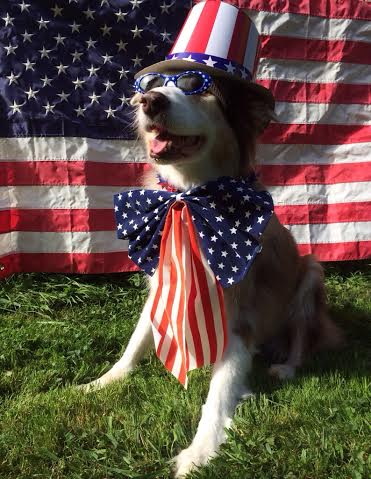

In [114]:
outliar_url = image_prediction[image_prediction['tweet_id'] == 749981277374128128]['jpg_url'].iloc[0]
Image('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg', height =200,width= 200)

In [115]:
# Let's see rating_numerator with values under 5
archive_clean[archive_clean['rating_numerator' ] < 5][['text']]

,text
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
605,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
765,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
883,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP
912,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"
1189,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl
1219,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z
1249,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz


We see that values less than 10 are posible, so we are consider those as good values even though as We saw in the photos where tweets with rating_numerator with values lees than 10 some are not dogs, We could manually can drop those photos but We are goin to consider that rating_numerator below 10 are valid.

In [116]:
# Let's drop the rows 516 is a date insted a rating and row 979 because the 
# value 1776 as rating_numerator is a aoutlier.
archive_clean = archive_clean.drop( index=[516, 979])


In [117]:
# Let's create a new column called rating
archive_clean['rating'] = archive_clean.rating_numerator/archive_clean.rating_denominator
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,1.2


In [118]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2137 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2137 non-null   datetime64[ns, UTC]
 4   source                      2137 non-null   object             
 5   text                        2137 non-null   object             
 6   retweeted_status_id         145 non-null    float64            
 7   retweeted_status_user_id    145 non-null    float64            
 8   retweeted_status_timestamp  145 non-null    object             
 9   expanded_urls               2137 non-null   object             
 10  rating_numerator            2137 non-null   float64         

We have clenad the rating_numerator, rating_denominator and the new column rating.

#### Issue #6
In the text column there are tweets that star with RT@ that are retweets that do not interest us.

#### Define
We found that in the column text there is a patron (RT @) where those rows are retweets and we want to drop them

#### Code
We are going to extract the tweets with the patron RT @ because those are retweet and drop them.

In [119]:
# Find all the retweets 
retweets = archive_clean.text.str.match('^RT @')

# Only keep the tweets that aren't retweets
archive_clean = archive_clean[~retweets]

#### Test

In [120]:
archive_clean.text.str.match('^RT @').sum()

0

We got it!

In [121]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1992 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1992 non-null   datetime64[ns, UTC]
 4   source                      1992 non-null   object             
 5   text                        1992 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1992 non-null   object             
 10  rating_numerator            1992 non-null   float64         

We see that retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp   have 0 non null and we don't need it.

In [122]:
# Remove the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, 
# retweeted_status_user_id, retweeted_status_timestamp
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
         'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   int64              
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   expanded_urls       1992 non-null   object             
 5   rating_numerator    1992 non-null   float64            
 6   rating_denominator  1992 non-null   float64            
 7   name                1371 non-null   object             
 8   stage               332 non-null    object             
 9   rating              1992 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 171.2+ KB


#### Issue #7 
Image_prediction has 66 duplicated jpg_url (imges).

#### Define
We have found that there were 66 duplicated jpg_url that we have to drop.

#### Code
We are going to use drop_duplicated method.

In [123]:
# Let's dropp 66 duplicated values rows in jpg_url column
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [124]:
# Check if there are duplicated jpg_url
image_clean.jpg_url.duplicated().sum()

0

We got it!

In [125]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


#### Issue #8 
We got 324 rows where all prediction(p1_dog, p2_dog and p3_dog) are false, some prediction are not dog. We need only one colums  with all different breeds.

#### Define
The columns p_dog's have 324 rows where all of them are false, so we have to drop them and create a new column with all the type of breeds.

#### Code
We are going to change all breed dogs to lowercase, then make a query where all the p_dog's are False y then drop them.

In [126]:
# Let's change all the breeds to lowercase
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

In [127]:
# Let's count al the breed in p1
image_clean.p1.value_counts()

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    55
                     ... 
lorikeet                1
fire_engine             1
carousel                1
ibex                    1
orange                  1
Name: p1, Length: 378, dtype: int64

Now all breed names are lowercase.


We consider that when all prediction are False the algorithm is no able to reconaise as dog the image.

In [128]:
# Let's get the index where all the p_dog are false
index_drop = image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False').index
index_drop

Int64Index([   6,   17,   18,   21,   25,   29,   45,   50,   51,   53,
            ...
            1953, 1956, 1975, 1979, 2012, 2021, 2022, 2046, 2052, 2074],
           dtype='int64', length=318)

In [129]:
len(index_drop)

318

There are 318 rows where p1_dog, p2_dog and p3_dog are False, they are not dogs or he algorithm is no able to recognize as dog the image. we are going to drop them.

In [130]:
# Drop all the rows where the index is equal to index_drop
image_clean.drop(index_drop, inplace= True)

#### Test

In [131]:
image_clean.shape

(1691, 12)

Now image_clean has 1691 rows

#### We are going to use wide_to_long panda fuction, but firstly we have change the name of the column. The idea is to have just 3 columns (p, p_conf and p_dog) and then create just 3 columns ('p', 'p_conf', 'p_dog').

In [132]:
# Rename columns
image_clean =image_clean.rename(columns={'p1_conf': 'p_conf1', 'p1_dog': 'p_dog1', 'p2_conf': 'p_conf2',
                                     'p2_dog': 'p_dog2','p3_conf': 'p_conf3','p3_dog': 'p_dog3'})
image_clean

,tweet_id,jpg_url,img_num,p1,p_conf1,p_dog1,p2,p_conf2,p_dog2,p3,p_conf3,p_dog3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [133]:
# We are going to melt p1, p2,p3, p_conf1, p_conf2, p_conf3, p_dog1,
# p_dog2, and p_dog3 in just 3 new columns.
image_clean = image_clean = pd.wide_to_long(image_clean, 
                stubnames=['p', 'p_conf', 'p_dog'], 
                i=['tweet_id','jpg_url','img_num'], 
                j='prediction').reset_index()
image_clean

,tweet_id,jpg_url,img_num,prediction,p,p_conf,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
...,...,...,...,...,...,...,...
5068,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2,malamute,0.078253,True
5069,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True
5070,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,chihuahua,0.323581,True
5071,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,pekinese,0.090647,True


In [134]:
image_clean.shape

(5073, 7)

Now image_clean has 5073 rows and each tweet_id is repeated three times with the breed of dog associate with its p_conf and if is true or false.

In [135]:
image_clean.head()

,tweet_id,jpg_url,img_num,prediction,p,p_conf,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


We are going to sort by tweet_id and the value of p_conf in ascending order so the largest value (maximun) of p_conf will be the last one associated to the tweet_id, that is each tweet is repeated three times, the third being the one that will have the largest value (maximun) of p_conf.  

Let's see that

In [136]:
image_clean.sort_values(by =['tweet_id','p_conf'], ascending = True)

,tweet_id,jpg_url,img_num,prediction,p,p_conf,p_dog
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,shetland_sheepdog,0.061428,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,rhodesian_ridgeback,0.072010,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
...,...,...,...,...,...,...,...
5068,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2,malamute,0.078253,True
5067,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,chihuahua,0.716012,True
5072,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True
5071,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,pekinese,0.090647,True


We see that the greater p_conf is the last one of each group of tweet_id.

In [137]:
# Let's group by tweet and chose the last one of each tweet_id group
image_clean = image_clean.sort_values(by =['tweet_id','p_conf'], 
                                      ascending = True).groupby("tweet_id").last().reset_index()
image_clean

,tweet_id,jpg_url,img_num,prediction,p,p_conf,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
1686,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,chesapeake_bay_retriever,0.425595,True
1687,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True
1688,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,paper_towel,0.170278,False
1689,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,chihuahua,0.716012,True


In [138]:
image_clean.describe()

,tweet_id,img_num,prediction,p_conf
count,1.691000e+03,1691.000000,1691.0,1691.000000
mean,7.408680e+17,1.215257,1.0,0.604982
std,6.847934e+16,0.575458,0.0,0.266716
min,6.660209e+17,1.000000,1.0,0.044333
25%,6.776930e+17,1.000000,1.0,0.377784
50%,7.156808e+17,1.000000,1.0,0.606654
75%,7.968129e+17,1.000000,1.0,0.852629
max,8.921774e+17,4.000000,1.0,0.999984


In [139]:
image_clean.shape

(1691, 7)

#### Issue #11
Merging the three data frame in only one dataframe by tweet_id.

#### Define
Once We have cleaned the tree dataFrame, We can merge in just one dataframe

#### Code
We are going to Merge archive_clean with twitter_count_clean and the result of that will be merge with image_clean.

Because archive_clean does not have any retweets, when we merge the two dataframe this should also remove any cero favorite_count values.

So here we only going to merge the two dataframe and after that we will check if all favorite_count with the value cero dissapear.

In [140]:
twitter_count_clean.dtypes

tweet_id          object
favorite_count     int64
retweet_count      int64
dtype: object

The other two dataframe have the tweet_id as int64, even though we are not going todo any math operation for obvious reasons, just for simplicite we are goig to change tweet_id in twitter_count to int64 to make it compatible when doing the merger.

In [141]:
# Change the dtype to integer
twitter_count_clean.tweet_id = twitter_count_clean.tweet_id.astype(dtype=np.int64)

In [142]:
# Merge the archive_clean with twitter_count_clean
archive_master = archive_clean.merge(twitter_count_clean, how='left', on='tweet_id')

#### Test

In [143]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   int64              
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   expanded_urls       1992 non-null   object             
 5   rating_numerator    1992 non-null   float64            
 6   rating_denominator  1992 non-null   float64            
 7   name                1371 non-null   object             
 8   stage               332 non-null    object             
 9   rating              1992 non-null   float64            
 10  favorite_count      1992 non-null   int64              
 11  retweet_count       1992 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

Now we have all the column from archive_clean and twitter_count_clean in one dataframe called archive_master

In [144]:
# Let's check if there are some favorite_count equal to cero.
archive_master.query('favorite_count == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rating,favorite_count,retweet_count


We see that all favorite_count == 0 have been removed

In [145]:
archive_master.tweet_id.duplicated().sum()

0

In [146]:
# We are going to merge archive_master with image_clean and as result we'll get just
# one dataframe
archive_master = pd.merge(archive_master, image_clean, how='left', on=['tweet_id'])

#### Test

In [147]:
archive_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rating,favorite_count,retweet_count,jpg_url,img_num,prediction,p,p_conf,p_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1.3,39467,8853,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   int64              
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   expanded_urls       1992 non-null   object             
 5   rating_numerator    1992 non-null   float64            
 6   rating_denominator  1992 non-null   float64            
 7   name                1371 non-null   object             
 8   stage               332 non-null    object             
 9   rating              1992 non-null   float64            
 10  favorite_count      1992 non-null   int64              
 11  retweet_count       1992 non-null   int64              
 12  jpg_url             1625 non-null 

Now we have just one dataframe

In [149]:
# Let's see the name of the columns
archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'rating',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'prediction',
       'p', 'p_conf', 'p_dog'],
      dtype='object')

In [150]:
# We are going to drop the column img_num and prediction we don't need it
archive_master.drop(['img_num', 'prediction'], axis=1, inplace=True)

In [151]:
# Let's check the column again
archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'rating',
       'favorite_count', 'retweet_count', 'jpg_url', 'p', 'p_conf', 'p_dog'],
      dtype='object')

In [152]:
# Now we are going to rename some columns to make them more meaningful.
archive_master = archive_master.rename({'text': 'tweet_text', 'name': 'name_dog', 'stage': 'stage_dog','p':  'breed_dog',
                      'p_conf': 'confidence_level', 'jpg_url': 'tweet_image', 'p_dog': 'prediction'}, axis=1)
archive_master.head(2)

,tweet_id,timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,name_dog,stage_dog,rating,favorite_count,retweet_count,tweet_image,breed_dog,confidence_level,prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1.3,39467,8853,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,1.3,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True


In [153]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   int64              
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   tweet_text          1992 non-null   object             
 4   expanded_urls       1992 non-null   object             
 5   rating_numerator    1992 non-null   float64            
 6   rating_denominator  1992 non-null   float64            
 7   name_dog            1371 non-null   object             
 8   stage_dog           332 non-null    object             
 9   rating              1992 non-null   float64            
 10  favorite_count      1992 non-null   int64              
 11  retweet_count       1992 non-null   int64              
 12  tweet_image         1625 non-null 

#### Now we have a single clean table (archive master) that brings together the three previous tables that we have cleaned.

<a id='store'></a>
## Store Data¶

Save archive_master  as "twitter_archive_master.csv".


In [154]:
#The the archive_master as twitter_archive_master
archive_master.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
## Analysis and visualization

In [155]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   int64              
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   tweet_text          1992 non-null   object             
 4   expanded_urls       1992 non-null   object             
 5   rating_numerator    1992 non-null   float64            
 6   rating_denominator  1992 non-null   float64            
 7   name_dog            1371 non-null   object             
 8   stage_dog           332 non-null    object             
 9   rating              1992 non-null   float64            
 10  favorite_count      1992 non-null   int64              
 11  retweet_count       1992 non-null   int64              
 12  tweet_image         1625 non-null 

### The 10 dog names with the most number of tweets

In [156]:
archive_master.groupby('name_dog').count().sort_values(by = 'tweet_id', 
        ascending = False).reset_index()[['name_dog', 'tweet_id']].rename({'tweet_id': 'count'}, axis=1). head(10)

,name_dog,count
0,Charlie,11
1,Lucy,10
2,Oliver,10
3,Cooper,10
4,Tucker,9
5,Penny,9
6,Winston,8
7,Sadie,8
8,Daisy,7
9,Lola,7


### Correlation between likes and retweets

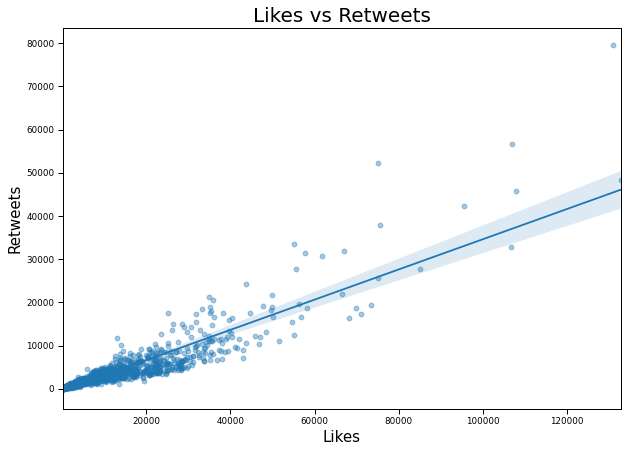

In [157]:
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})
g = sns.regplot(x="favorite_count", y="retweet_count", data= archive_master, scatter_kws={'alpha':0.4})
g.set_xlabel('Likes')
g.set_ylabel('Retweets')
g.set(title='Likes vs Retweets')
plt.gcf().set_size_inches(10, 7);

We see a positive correlation among likes and retweets.

### Get the sum of the retweet_count and the count of the tweets groups by weeks

In [158]:
weekly_data = archive_master[['timestamp', 'retweet_count', 'tweet_id']]


weekly_data.set_index('timestamp', inplace=True)
weekly_data.index = pd.to_datetime(weekly_data.index)
weekly_data = weekly_data.resample('1W').agg({'retweet_count': 'sum', 
                                'tweet_id': 'count'}).rename({'retweet_count':'weekly_retweets', 
                                                              'tweet_id':'weekly_tweets'}, axis=1).reset_index()
weekly_data

,timestamp,weekly_retweets,weekly_tweets
0,2015-11-15 00:00:00+00:00,627,3
1,2015-11-22 00:00:00+00:00,74331,137
2,2015-11-29 00:00:00+00:00,76126,139
3,2015-12-06 00:00:00+00:00,103331,115
4,2015-12-13 00:00:00+00:00,119447,115
...,...,...,...
86,2017-07-09 00:00:00+00:00,75446,12
87,2017-07-16 00:00:00+00:00,69719,11
88,2017-07-23 00:00:00+00:00,78113,10
89,2017-07-30 00:00:00+00:00,87024,13


### Weekly Retweets over time

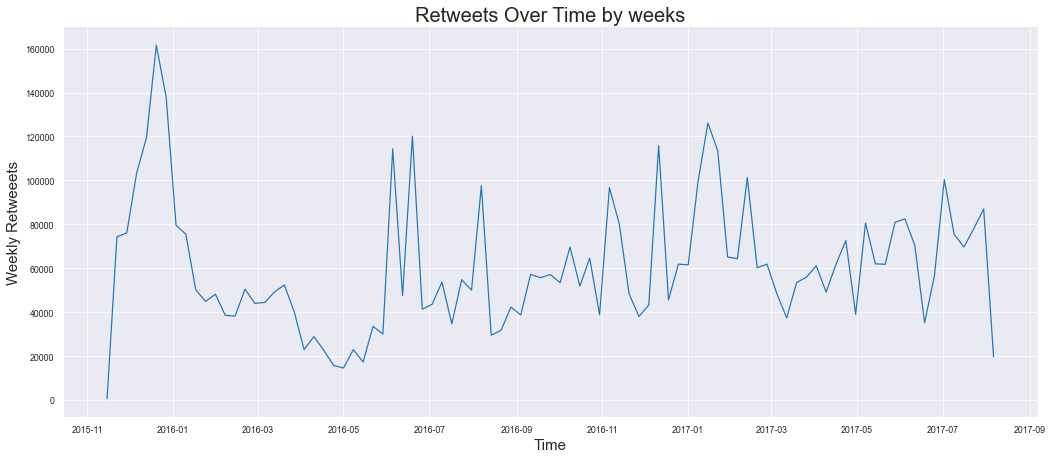

In [159]:
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.relplot(x="timestamp", y="weekly_retweets", kind = 'line',
               data=weekly_data)
g.set_axis_labels("Time", "Weekly Retweeets")
g.set(title='Retweets Over Time by weeks')
plt.gcf().set_size_inches(20, 7)

There is big peak of the weekly retwees during the 2015-12-27 (137,876 retweets)


### Weekly tweets over time

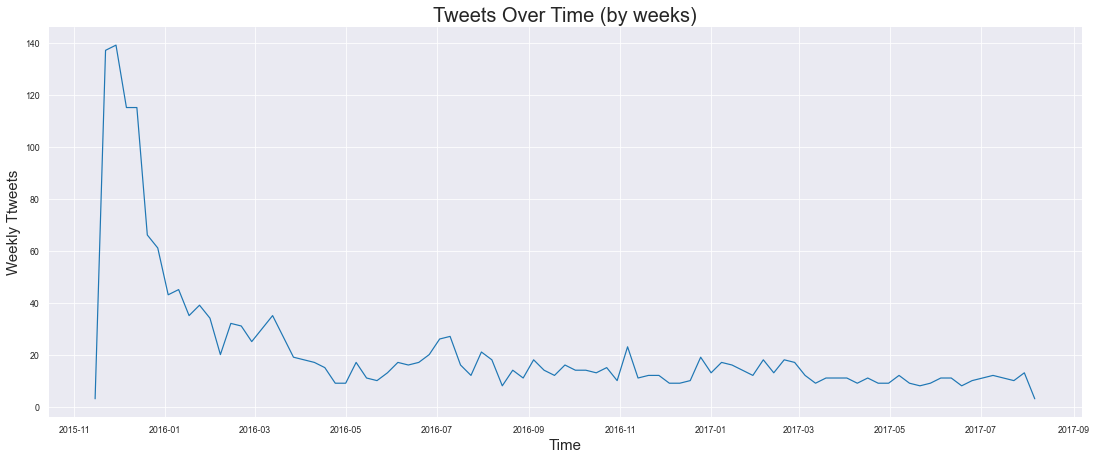

In [160]:
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.relplot(x="timestamp", y="weekly_tweets", kind = 'line',
               data=weekly_data)
g.set_axis_labels("Time", "Weekly Ttweets")
g.set(title='Tweets Over Time (by weeks)')
plt.gcf().set_size_inches(20, 7)

There is a decreasing trend in the number of weekly tweets over time

#### We are going to create a dataframe group by brestage_dog with the total number of tweets, the rating mean of each stage, the favorite_count mean, the retweets mean and the mean of the confidence_level.¶

In [161]:
tweet_by_stage = archive_master.groupby('stage_dog').agg({  'tweet_id': 'count', 
                                                          'rating': 'mean', 'favorite_count': 'mean',
                                                          'retweet_count': 'mean', 'confidence_level':'mean'}).reset_index()
tweet_by_stage.rename({'tweet_id': 'number_tweets', 'rating': 'rating_mean', 'favorite_count': 'favorite_mean', 
    'retweet_count': 'retweet_mean', 'confidence_level':'confidence_level_mean'}, axis=1, inplace=True)


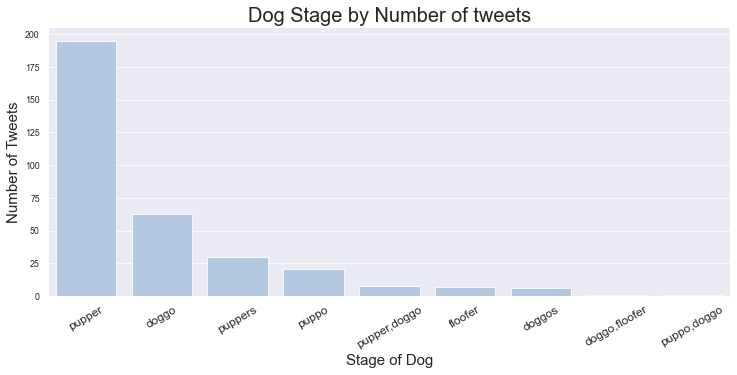

In [162]:
# Lets make a plot that shows the Dog Stage by Number of tweets
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="stage_dog", y="number_tweets",  kind="bar", color= '#abc9ea', 
               data=tweet_by_stage.sort_values(by = 'number_tweets', ascending= False))
g.set_axis_labels("Stage of Dog", "Number of Tweets")
g.set_xticklabels(rotation=30, size = 12)
g.set(title='Dog Stage by Number of tweets')
plt.gcf().set_size_inches(20, 7)

We have to remember that we divided in nine differente stage of dog, because we considered tweets with more than one stage of dog, We found images with more the one dog like puppers or combination like pupper-doggo have tweets too.

#### We are going to create a dataframe group by breed of dog with the total number of tweets, the rating mean of each breed, the favorite_coount mean, the retweets mean and the mean of the confidence_level.

In [163]:
tweet_by_breed = archive_master.groupby('breed_dog').agg({
    'tweet_id': 'count', 'rating': 'mean', 'favorite_count': 'mean', 
    'retweet_count': 'mean', 'confidence_level':'mean'}).reset_index()

tweet_by_breed.rename({'tweet_id': 'number_tweets', 'rating': 'rating_mean', 'favorite_count': 'favorite_mean', 
    'retweet_count': 'retweet_mean', 'confidence_level':'confidence_level_mean'}, axis=1, inplace=True)

tweet_by_breed.head()

,breed_dog,number_tweets,rating_mean,favorite_mean,retweet_mean,confidence_level_mean
0,acorn_squash,2,1.000000,8057.000000,2015.000000,0.612048
1,afghan_hound,2,0.800000,12191.500000,3602.500000,0.513621
2,african_hunting_dog,1,0.800000,1763.000000,1198.000000,0.733025
3,airedale,12,0.983333,5280.833333,1393.750000,0.583771
4,american_staffordshire_terrier,13,1.100000,7559.538462,2204.923077,0.638157


### How many tweets does each breed of dog have?¶

The firts 20


In [164]:
tweet20_by_breed = tweet_by_breed.sort_values(by = 'number_tweets', 
                                              ascending = False)[['breed_dog', 'number_tweets']].head(20)
tweet20_by_breed

,breed_dog,number_tweets
76,golden_retriever,127
108,labrador_retriever,90
136,pembroke,87
45,chihuahua,75
140,pug,52
139,pomeranian,38
46,chow,38
151,samoyed,37
187,toy_poodle,37
116,malamute,28


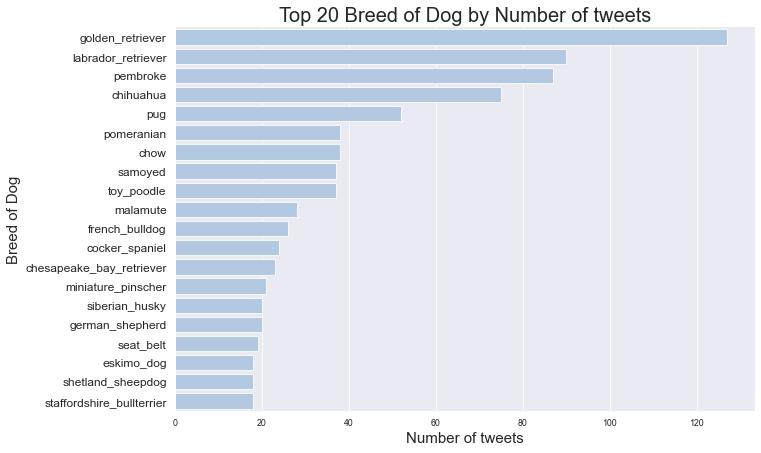

In [165]:
# We are going to plot how many tweet each breed has (The first 20)
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="number_tweets", y="breed_dog", kind = 'bar',color= '#abc9ea', data=tweet20_by_breed )
g.set_axis_labels( 'Number of tweets', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by Number of tweets')
g.set_yticklabels( size = 12)
plt.gcf().set_size_inches(30, 10)

Golden_retrieve has the largest number of tweets

In [166]:
# Let's see how many tweets have the first 20 rating breed of dogs
tweet_by_breed.sort_values( by = 'rating_mean', ascending= False)[['breed_dog','rating_mean', 'number_tweets']].head(20)

,breed_dog,rating_mean,number_tweets
120,military_uniform,1.400000,1
178,syringe,1.300000,1
39,canoe,1.300000,1
133,paper_towel,1.300000,1
150,saluki,1.250000,4
33,briard,1.233333,3
96,irish_setter,1.233333,3
28,border_terrier,1.214286,7
163,silky_terrier,1.200000,1
92,hyena,1.200000,1


We see that all of them have few tweets, in order to make tha analisys more consistent, I'm going to consider breed of dogs with at least 10 tweets

In [167]:
# Get breed_dog with more than ten tweets
breed_10_more_tweets = tweet_by_breed[tweet_by_breed['number_tweets'] >= 10]
breed_10_more_tweets

,breed_dog,number_tweets,rating_mean,favorite_mean,retweet_mean,confidence_level_mean
3,airedale,12,0.983333,5280.833333,1393.750000,0.583771
4,american_staffordshire_terrier,13,1.100000,7559.538462,2204.923077,0.638157
13,basset,13,1.115385,13866.000000,3264.692308,0.640428
16,beagle,16,1.025000,4578.250000,1360.000000,0.568552
18,bernese_mountain_dog,10,1.120000,6790.700000,1604.100000,0.801816
21,blenheim_spaniel,10,1.120000,9280.900000,2583.300000,0.699588
27,border_collie,12,1.000000,8933.083333,2207.750000,0.576845
31,boxer,10,1.060000,9495.100000,2832.000000,0.682523
41,cardigan,15,1.153333,14121.266667,3802.733333,0.570455
44,chesapeake_bay_retriever,23,1.065217,10130.304348,2730.130435,0.544114


In [168]:
breed_10_more_tweets.breed_dog.count()

45

We have 45 breed of dogs with at least 10 tweets

#### Let's get the top 20 breed of dog with the higher rating with at least ten tweets

In [169]:
breed20_rating = breed_10_more_tweets.sort_values( by = 'rating_mean', 
                                                  ascending= False)[['breed_dog', 'rating_mean']].head(20)
breed20_rating

,breed_dog,rating_mean
68,eskimo_dog,1.177778
151,samoyed,1.170270
76,golden_retriever,1.164961
46,chow,1.157895
41,cardigan,1.153333
80,great_pyrenees,1.150000
103,kelpie,1.145455
136,pembroke,1.137931
162,siberian_husky,1.130000
148,rottweiler,1.129412


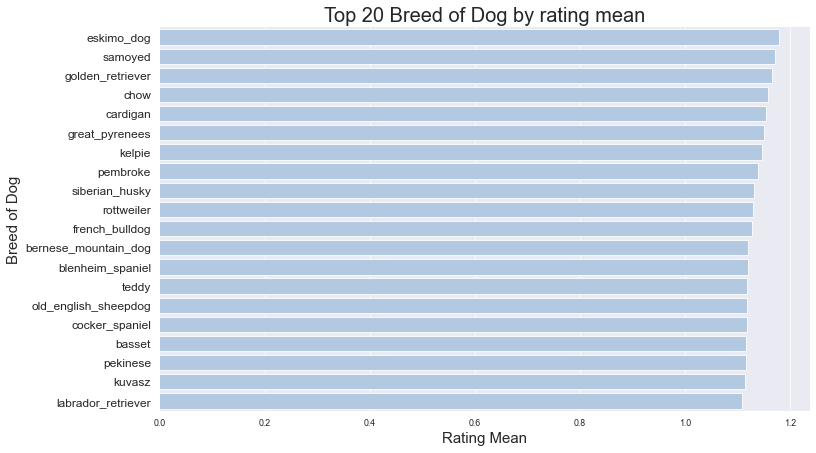

In [170]:
# Let's make a plot the top 20 breed of dog with the higher rating with at least ten tweets¶
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="rating_mean", y="breed_dog", kind = 'bar',color= '#abc9ea', data=breed20_rating )
g.set_axis_labels( 'Rating Mean', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by rating mean')
g.set_yticklabels( size = 12)
plt.gcf().set_size_inches(30, 10)

#### Let's get the the first twenty  breed of dog by average mean likes

In [171]:
# Let's get the the first twenty breed of dog by average mean likes¶
breed_favorite = breed_10_more_tweets.sort_values(by = 'favorite_mean', 
                                                  ascending= False)[['breed_dog','favorite_mean']].head(20)
breed_favorite

,breed_dog,favorite_mean
71,french_bulldog,17913.000000
41,cardigan,14121.266667
13,basset,13866.000000
80,great_pyrenees,12932.000000
151,samoyed,12692.837838
109,lakeland_terrier,12402.600000
68,eskimo_dog,12001.555556
76,golden_retriever,11560.968504
136,pembroke,10630.850575
108,labrador_retriever,10593.222222


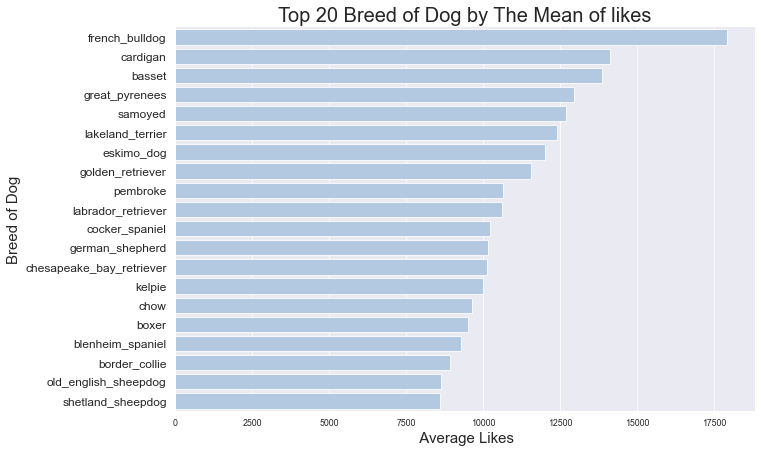

In [172]:
#Let's make a plot of average mean likes by breed of dog
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="favorite_mean", y="breed_dog", kind = 'bar',color= '#abc9ea', data= breed_favorite )
g.set_axis_labels( ' Average Likes', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by The Mean of likes')
g.set_yticklabels( size = 12)
plt.gcf().set_size_inches(30, 10)

The breed of dog with the largets mean of likes is french_bulldog, you can see it right below   
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇

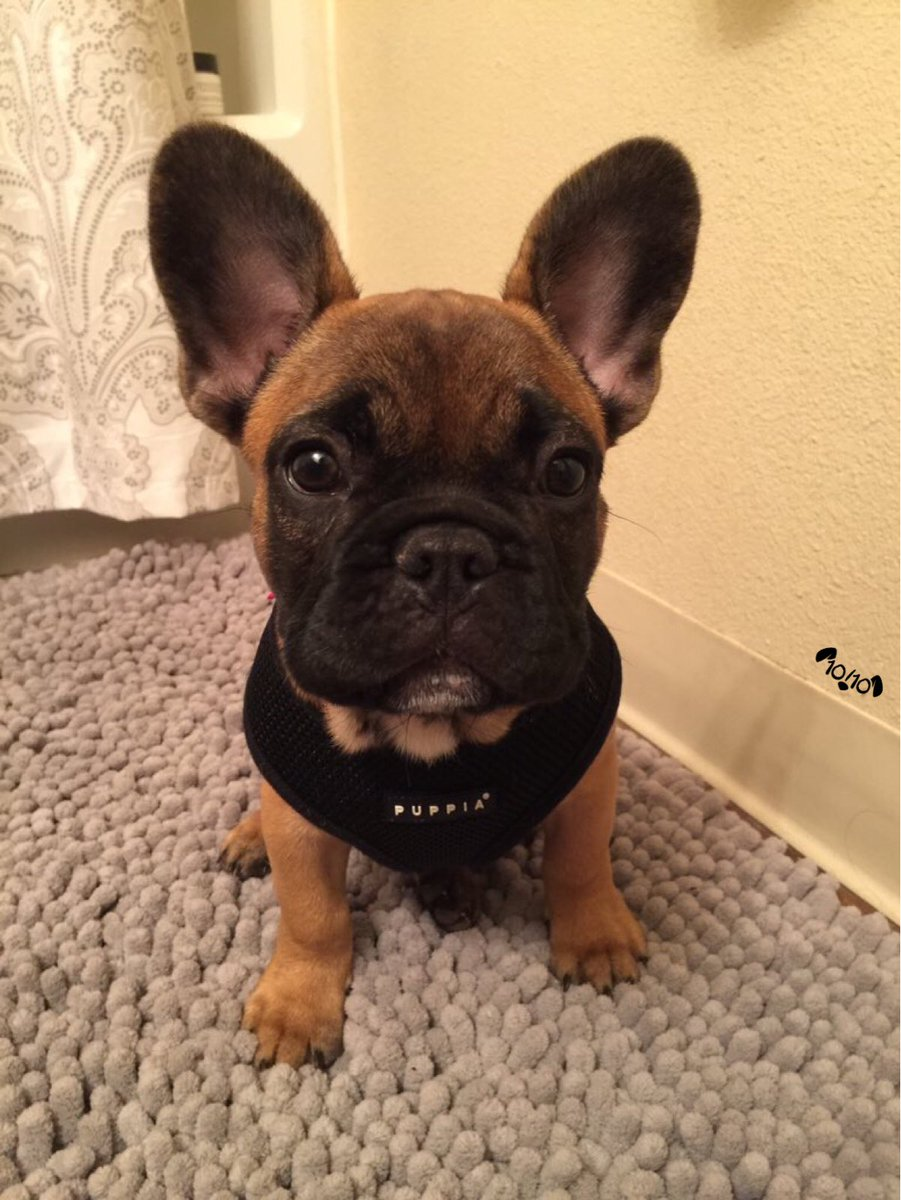

In [173]:
Image(archive_master[archive_master['breed_dog'] ==
                     'french_bulldog'][['tweet_image']].iloc[3][0], height =200, width =400)

#### The top 20 breed by retweets (at least 10 tweets)

In [174]:
breed_retweet = breed_10_more_tweets.sort_values(by = 'retweet_mean', 
                                                  ascending= False)[['breed_dog','retweet_mean']].head(20)
breed_retweet

,breed_dog,retweet_mean
68,eskimo_dog,4768.888889
80,great_pyrenees,4732.285714
71,french_bulldog,4683.923077
151,samoyed,4254.216216
109,lakeland_terrier,4201.933333
41,cardigan,3802.733333
108,labrador_retriever,3400.233333
76,golden_retriever,3317.850394
13,basset,3264.692308
48,cocker_spaniel,3257.625000


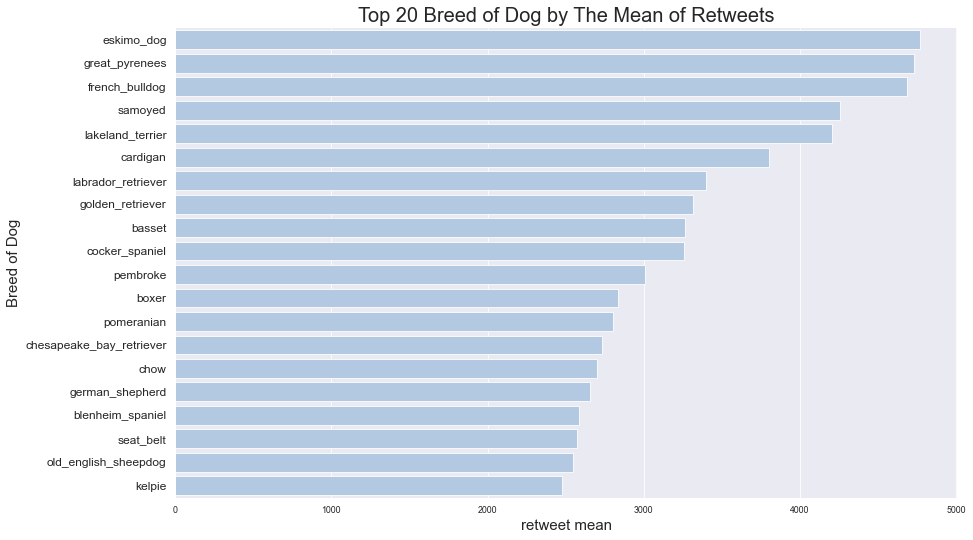

In [175]:
# Mmake a plot of the top 20 breed by retweets (at least 10 tweets)
sns.set_context("paper", rc={"font.size":50,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="retweet_mean", y="breed_dog", kind = 'bar',color= '#abc9ea', data= breed_retweet)
g.set_axis_labels( 'retweet mean', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by The Mean of Retweets')
g.set_yticklabels(size = 12)
plt.gcf().set_size_inches(30, 10)